### The Sparks Foundation - Task 2

### Stock Market Prediction using Numerical and Textual Analysis


#### Problem Statement

Create a Hybrid Model for the prediction of stock market using Textual and Numerical Analysis.
- Stock to Analyze: SENSEX (S&P BSE SENSEX)
- Target variable: Binary (0/1) to indicate whether stock would go up or down
- Model Used: Random Forrest Classifier

### Imports

In [ ]:
import yfinance as yf
import pandas as pd

### Dataset

In [ ]:
bse = yf.Ticker('^BSESN')

In [ ]:
bse = bse.history(period='max')

In [ ]:
bse

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0
...,...,...,...,...,...,...,...
2022-11-14 00:00:00+05:30,61765.859375,61916.238281,61572.031250,61624.148438,20600,0,0
2022-11-15 00:00:00+05:30,61630.050781,61955.960938,61436.898438,61872.988281,11400,0,0
2022-11-16 00:00:00+05:30,61708.628906,62052.570312,61708.628906,61980.718750,6600,0,0


In [ ]:
bse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6254 entries, 1997-07-01 00:00:00+05:30 to 2022-11-18 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6254 non-null   float64
 1   High          6254 non-null   float64
 2   Low           6254 non-null   float64
 3   Close         6254 non-null   float64
 4   Volume        6254 non-null   int64  
 5   Dividends     6254 non-null   int64  
 6   Stock Splits  6254 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 390.9 KB


### Data Cleaning

In [ ]:
bse.reset_index(inplace = True)

In [ ]:
bse

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1,1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
2,1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
3,1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
4,1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0
...,...,...,...,...,...,...,...,...
6249,2022-11-14 00:00:00+05:30,61765.859375,61916.238281,61572.031250,61624.148438,20600,0,0
6250,2022-11-15 00:00:00+05:30,61630.050781,61955.960938,61436.898438,61872.988281,11400,0,0
6251,2022-11-16 00:00:00+05:30,61708.628906,62052.570312,61708.628906,61980.718750,6600,0,0
6252,2022-11-17 00:00:00+05:30,61812.359375,62050.800781,61643.269531,61750.601562,9100,0,0


In [ ]:
bse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6254 entries, 0 to 6253
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                       
---  ------        --------------  -----                       
 0   Date          6254 non-null   datetime64[ns, Asia/Kolkata]
 1   Open          6254 non-null   float64                     
 2   High          6254 non-null   float64                     
 3   Low           6254 non-null   float64                     
 4   Close         6254 non-null   float64                     
 5   Volume        6254 non-null   int64                       
 6   Dividends     6254 non-null   int64                       
 7   Stock Splits  6254 non-null   int64                       
dtypes: datetime64[ns, Asia/Kolkata](1), float64(4), int64(3)
memory usage: 391.0 KB


In [ ]:
bse['Date'] = pd.to_datetime(bse['Date']).dt.date

In [ ]:
bse.set_index('Date', inplace = True)

In [ ]:
bse

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0
...,...,...,...,...,...,...,...
2022-11-14,61765.859375,61916.238281,61572.031250,61624.148438,20600,0,0
2022-11-15,61630.050781,61955.960938,61436.898438,61872.988281,11400,0,0
2022-11-16,61708.628906,62052.570312,61708.628906,61980.718750,6600,0,0


<AxesSubplot:xlabel='Date'>

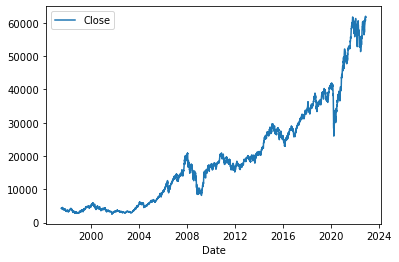

In [ ]:
bse.plot.line(y="Close", use_index = True)

In [ ]:
del bse['Dividends']
del bse['Stock Splits']

### Creating Target Variable

In [ ]:
bse['Tomorrow'] = bse['Close'].shift(-1)

In [ ]:
bse

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137
...,...,...,...,...,...,...
2022-11-14,61765.859375,61916.238281,61572.031250,61624.148438,20600,61872.988281
2022-11-15,61630.050781,61955.960938,61436.898438,61872.988281,11400,61980.718750
2022-11-16,61708.628906,62052.570312,61708.628906,61980.718750,6600,61750.601562


In [ ]:
bse['Target'] = (bse['Tomorrow'] > bse['Close']).astype('int')

In [ ]:
bse

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902,1
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961,0
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824,1
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195,0
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137,1
...,...,...,...,...,...,...,...
2022-11-14,61765.859375,61916.238281,61572.031250,61624.148438,20600,61872.988281,1
2022-11-15,61630.050781,61955.960938,61436.898438,61872.988281,11400,61980.718750,1
2022-11-16,61708.628906,62052.570312,61708.628906,61980.718750,6600,61750.601562,0


Our target indicates whether the closing price has gone up or down since yesterday.

In [ ]:
bse.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902,1
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961,0
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824,1
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195,0
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137,1


### Model Preparation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = bse.iloc[:-100]
test = bse.iloc[-100:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

precision score bcs we want to see what percentage of the time we said the market would go up did the market actually go up

In [ ]:
preds

Date
2022-06-24    0
2022-06-27    0
2022-06-28    0
2022-06-29    0
2022-06-30    0
             ..
2022-11-14    0
2022-11-15    0
2022-11-16    0
2022-11-17    0
2022-11-18    0
Length: 100, dtype: int32

In [ ]:
precision_score(test['Target'], preds)

0.7142857142857143

In [ ]:
combined = pd.concat([test['Target'], preds], axis=1)

<AxesSubplot:xlabel='Date'>

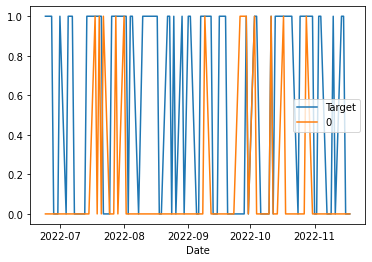

In [ ]:
combined.plot()

In [ ]:
bse['Target'].value_counts()

1    3325
0    2929
Name: Target, dtype: int64

In [ ]:
preds.value_counts()

0    86
1    14
dtype: int64

In [ ]:
test['Target'].value_counts()

1    57
0    43
Name: Target, dtype: int64

It appears that we've predicted the stock would go up more than it actually did

### Backtesting

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [ ]:
# every trading year has about 250 days so start = 2500 indicates 10 years. Here, we start with training on first 10 years
# then predicting on the 11th year. We then train on the first 11 years and predict on the 12th year and this continues.
# 1st iteration: i = 2500, i + step = 2750, train = 0 to 2500, test = 2500 to 2750
# 2nd iteration i = 2750, i + step = 3000, train = 0 to 2750, test = 2750 to 3000
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(bse, model, predictors)

In [ ]:
predictions['Predictions'].value_counts()

0    2204
1    1550
Name: Predictions, dtype: int64

In [ ]:
predictions

,Target,Predictions
Date,,
2007-08-02,1,1
2007-08-03,0,1
2007-08-06,1,1
2007-08-07,1,1
2007-08-08,0,1
...,...,...
2022-11-14,1,0
2022-11-15,1,0
2022-11-16,0,0


In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5148387096774194

In [ ]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.524774
0    0.475226
Name: Target, dtype: float64

backtesting shows that the model actually predicts worse than what the actual percentage of the days shows.

### Rolling window method

In [ ]:
# a human while predicting would look at the stock price data and wonder whether the stock went up in the last 2 days, a week ago, 3 months ago, a year ago, 5 years ago?
horizons = [2, 5, 20 , 80 , 260, 1000]

# using these horizons we'll calculate the rolling means of closing prices in these periods and comparing with today's closing price:
# if the market has gone down a lot can it go up tomorrow?
# if the market has gone up a lot can it go down tomorrow?

new_predictors = []

for horizon in horizons:
    rolling_averages = bse.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    bse[ratio_column] = bse['Close'] / rolling_averages['Close']

    # trend is the number of days the stock went up in this period
    trend_column = f"Trend_{horizon}"
    bse[trend_column] = bse.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [ ]:
bse

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_20,Trend_20,Close_Ratio_80,Trend_80,Close_Ratio_260,Trend_260,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961,0,1.003826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824,1,0.998794,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195,0,1.000042,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137,1,0.996243,1.0,0.994612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,61765.859375,61916.238281,61572.031250,61624.148438,20600,61872.988281,1,0.998615,1.0,1.006103,2.0,1.024667,14.0,1.049778,48.0,1.072666,125.0,1.340981,538.0
2022-11-15,61630.050781,61955.960938,61436.898438,61872.988281,11400,61980.718750,1,1.002015,1.0,1.007902,2.0,1.025434,14.0,1.052370,48.0,1.076945,126.0,1.345589,539.0
2022-11-16,61708.628906,62052.570312,61708.628906,61980.718750,6600,61750.601562,0,1.000870,2.0,1.006551,3.0,1.024190,14.0,1.052588,48.0,1.078676,127.0,1.347116,540.0


In [ ]:
bse.dropna(inplace= True)

In [ ]:
bse.shape

(5253, 19)

<AxesSubplot:xlabel='Date'>

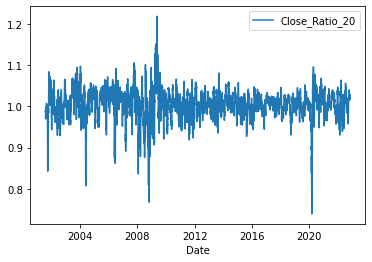

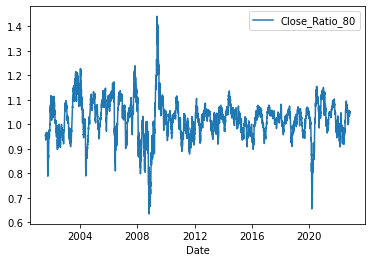

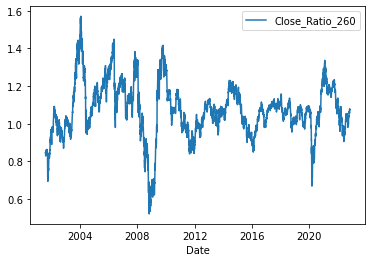

In [ ]:
bse.plot.line(y="Close_Ratio_20", use_index = True)
bse.plot.line(y="Close_Ratio_80", use_index = True)
bse.plot.line(y="Close_Ratio_260", use_index = True)

<AxesSubplot:xlabel='Date'>

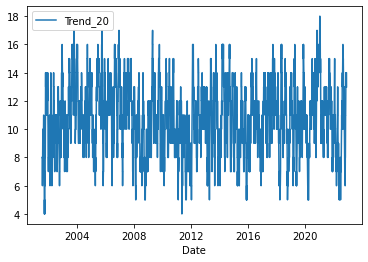

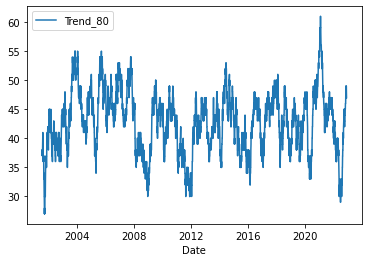

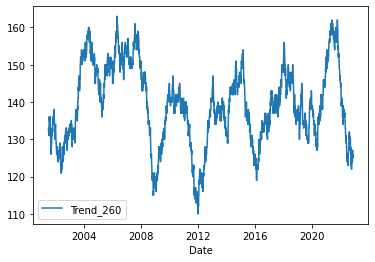

In [ ]:
bse.plot.line(y="Trend_20", use_index = True)
bse.plot.line(y="Trend_80", use_index = True)
bse.plot.line(y="Trend_260", use_index = True)

In [ ]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    # making sure our model is more confident when it predicts up
    preds[preds >= 0.6] = 1
    preds[preds <0.6] = 0
    preds = pd.Series(preds, index = test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [ ]:
predictions = backtest(bse, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    2453
1.0     300
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.6166666666666667

### Textual Analysis

In [ ]:
news = pd.read_csv('Downloads/india-news-headlines.csv')

In [ ]:
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [ ]:
news.shape

(3650970, 3)

In [ ]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [ ]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [ ]:
news.tail()

,publish_date,headline_category,headline_text
3650965,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,2022-03-31,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
news['headline_category'].value_counts()

india                                                    297491
unknown                                                  209583
city.mumbai                                              150451
city.delhi                                               137648
business.india-business                                  121195
                                                          ...  
nepal-india-earthquake.opinion                                8
elections.lok-sabha-elections-2019.tripura.news               8
best-products.home-decor-and-garden.living-room-decor         8
profiles.india-profiles                                       8
pms-us-visit                                                  8
Name: headline_category, Length: 1041, dtype: int64

In [ ]:
news['headline_category'].value_counts().count()

1041

In [ ]:
news['headline_text'].value_counts()

Straight Answers                                                                                                          6723
Cartoons                                                                                                                  1536
Straight answers                                                                                                          1500
Photogallery                                                                                                              1353
Your say                                                                                                                  1012
                                                                                                                          ... 
Pak President Asif Ali Zardari at 7RCR; meets Manmohan Singh                                                                 1
Why Goa Inc is so happy with CM Manohar Parrikar                                                               

In [ ]:
news['headline_text'].value_counts().count()

3387380

In [ ]:
news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
news.duplicated().sum()

24860

In [ ]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [ ]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3646165,2022-03-22,city.hubballi,BJP divided over probable induction of Basavar...
3648600,2022-03-27,city.chennai,Father; daughter killed in TN as e-bike on cha...
3648601,2022-03-27,city.chennai,Father; daughter killed in TN as e-bike on cha...
3649664,2022-03-29,city.hyderabad,Telangana logs 30 new Covid cases


In [ ]:
news.drop_duplicates(keep='last', inplace = True, ignore_index = True)

In [ ]:
news.duplicated().sum()

0

In [ ]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [ ]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]
  new.append(headlinetext)

In [ ]:
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [ ]:
newsdf

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-12-27,New generation Audi Q7 being tested in India. ...
...,...,...
7712,2001-03-02,Such A Long Journey
7713,2001-05-25,What Women Want
7714,2001-06-05,Darkness Triumphs
7715,2001-03-16,Tape and Tell


In [ ]:
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it is equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [ ]:
from textblob import TextBlob

polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [ ]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity


In [ ]:
newsdf

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935
...,...,...,...,...
7712,2022-03-27,F1 2022: Sergio Perez grabs pole position at S...,0.026188,0.371042
7713,2022-03-28,Adani Total forays into electric mobility infr...,0.055232,0.389939
7714,2022-03-29,'ONGC sells Russia's Sokol oil to Indian refin...,0.095037,0.404044
7715,2022-03-30,8 days; 7 hikes: Petrol crosses Rs 100/L mark....,0.037729,0.350965


In [ ]:
newsdf.rename(columns={'publish_date': 'Date'}, inplace = True)

In [ ]:
newsdf = newsdf.filter(['Date', 'polarity', 'subjectivity'], axis=1)

In [ ]:
newsdf

,Date,polarity,subjectivity
0,2001-01-02,0.193519,0.293056
1,2001-01-03,0.088462,0.407692
2,2001-01-04,0.091426,0.481895
3,2001-01-05,0.257415,0.465542
4,2001-01-06,0.219481,0.464935
...,...,...,...
7712,2022-03-27,0.026188,0.371042
7713,2022-03-28,0.055232,0.389939
7714,2022-03-29,0.095037,0.404044
7715,2022-03-30,0.037729,0.350965


In [ ]:
bse.reset_index(inplace=True)

In [ ]:
bse['Date'] = pd.to_datetime(bse['Date'])

In [ ]:
bse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5253 non-null   datetime64[ns]
 1   Open              5253 non-null   float64       
 2   High              5253 non-null   float64       
 3   Low               5253 non-null   float64       
 4   Close             5253 non-null   float64       
 5   Volume            5253 non-null   int64         
 6   Tomorrow          5253 non-null   float64       
 7   Target            5253 non-null   int32         
 8   Close_Ratio_2     5253 non-null   float64       
 9   Trend_2           5253 non-null   float64       
 10  Close_Ratio_5     5253 non-null   float64       
 11  Trend_5           5253 non-null   float64       
 12  Close_Ratio_20    5253 non-null   float64       
 13  Trend_20          5253 non-null   float64       
 14  Close_Ratio_80    5253 n

In [ ]:
newsdf.head()

,Date,polarity,subjectivity
0,2001-01-02,0.193519,0.293056
1,2001-01-03,0.088462,0.407692
2,2001-01-04,0.091426,0.481895
3,2001-01-05,0.257415,0.465542
4,2001-01-06,0.219481,0.464935


In [ ]:
bse = pd.merge(bse, newsdf, how='left', on=['Date'])

In [ ]:
bse

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,...,Close_Ratio_20,Trend_20,Close_Ratio_80,Trend_80,Close_Ratio_260,Trend_260,Close_Ratio_1000,Trend_1000,polarity,subjectivity
0,2001-07-20,3375.820068,3389.489990,3331.419922,3340.750000,0,3330.979980,0,0.995503,0.0,...,0.989313,8.0,0.955638,38.0,0.844732,133.0,0.837352,512.0,0.099687,0.429796
1,2001-07-23,3340.889893,3340.889893,3310.949951,3330.979980,0,3335.080078,1,0.998536,0.0,...,0.986240,8.0,0.954403,37.0,0.843553,132.0,0.835113,511.0,-0.015792,0.340023
2,2001-07-24,3326.840088,3340.909912,3306.169922,3335.080078,0,3301.969971,0,1.000615,1.0,...,0.988511,8.0,0.957005,38.0,0.845854,133.0,0.836348,512.0,0.001307,0.421550
3,2001-07-25,3307.159912,3338.219971,3296.429932,3301.969971,0,3259.030029,0,0.995011,1.0,...,0.980291,7.0,0.948533,38.0,0.838763,132.0,0.828258,511.0,0.019263,0.388796
4,2001-07-26,3298.639893,3318.600098,3254.280029,3259.030029,0,3251.530029,0,0.993455,0.0,...,0.969642,7.0,0.937232,38.0,0.829237,131.0,0.817698,511.0,-0.038500,0.372227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,2022-11-11,61311.019531,61840.968750,61311.019531,61795.039062,14400,61624.148438,0,1.009651,1.0,...,1.031271,14.0,1.054455,49.0,1.075660,126.0,1.345486,538.0,NaN,NaN
5249,2022-11-14,61765.859375,61916.238281,61572.031250,61624.148438,20600,61872.988281,1,0.998615,1.0,...,1.024667,14.0,1.049778,48.0,1.072666,125.0,1.340981,538.0,NaN,NaN
5250,2022-11-15,61630.050781,61955.960938,61436.898438,61872.988281,11400,61980.718750,1,1.002015,1.0,...,1.025434,14.0,1.052370,48.0,1.076945,126.0,1.345589,539.0,NaN,NaN
5251,2022-11-16,61708.628906,62052.570312,61708.628906,61980.718750,6600,61750.601562,0,1.000870,2.0,...,1.024190,14.0,1.052588,48.0,1.078676,127.0,1.347116,540.0,NaN,NaN


In [ ]:
#finding if any null values are present
bse.isnull().sum().sum()

312

In [ ]:
bse.dropna(inplace=True)

In [ ]:
bse.isnull().sum().sum()

0

In [ ]:
bse.set_index('Date', inplace = True)

In [ ]:
bse

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Close_Ratio_20,Trend_20,Close_Ratio_80,Trend_80,Close_Ratio_260,Trend_260,Close_Ratio_1000,Trend_1000,polarity,subjectivity
Date,,,,,,,,,,,,,,,,,,,,,
2001-07-20,3375.820068,3389.489990,3331.419922,3340.750000,0,3330.979980,0,0.995503,0.0,0.984784,...,0.989313,8.0,0.955638,38.0,0.844732,133.0,0.837352,512.0,0.099687,0.429796
2001-07-23,3340.889893,3340.889893,3310.949951,3330.979980,0,3335.080078,1,0.998536,0.0,0.987952,...,0.986240,8.0,0.954403,37.0,0.843553,132.0,0.835113,511.0,-0.015792,0.340023
2001-07-24,3326.840088,3340.909912,3306.169922,3335.080078,0,3301.969971,0,1.000615,1.0,0.994884,...,0.988511,8.0,0.957005,38.0,0.845854,133.0,0.836348,512.0,0.001307,0.421550
2001-07-25,3307.159912,3338.219971,3296.429932,3301.969971,0,3259.030029,0,0.995011,1.0,0.989816,...,0.980291,7.0,0.948533,38.0,0.838763,132.0,0.828258,511.0,0.019263,0.388796
2001-07-26,3298.639893,3318.600098,3254.280029,3259.030029,0,3251.530029,0,0.993455,0.0,0.983543,...,0.969642,7.0,0.937232,38.0,0.829237,131.0,0.817698,511.0,-0.038500,0.372227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,6900,57593.488281,1,0.997969,0.0,0.996133,...,1.025847,10.0,0.992503,39.0,1.035723,136.0,1.346461,542.0,-0.011677,0.373186
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,6300,57943.648438,1,1.002012,1.0,0.999105,...,1.027170,11.0,0.996525,39.0,1.039380,137.0,1.351147,543.0,0.055232,0.389939
2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,12100,58683.988281,1,1.003031,2.0,1.005338,...,1.031497,11.0,1.002696,39.0,1.045155,137.0,1.358600,544.0,0.095037,0.404044


In [ ]:
new_predictors.append('polarity')
new_predictors.append('subjectivity')

In [ ]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_20',
 'Trend_20',
 'Close_Ratio_80',
 'Trend_80',
 'Close_Ratio_260',
 'Trend_260',
 'Close_Ratio_1000',
 'Trend_1000',
 'polarity',
 'subjectivity']

### Combined Prediction

In [ ]:
predictions = backtest(bse, model, new_predictors)

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.6105610561056105

In [ ]:
test_1 = {}
for predictor in new_predictors:
    test_1[predictor]= bse[predictor].mean()

In [ ]:
test_1

{'Close_Ratio_2': 1.0002800937281404,
 'Trend_2': 1.0735726898175397,
 'Close_Ratio_5': 1.001157924876324,
 'Trend_5': 2.6827545615067687,
 'Close_Ratio_20': 1.0055913312881997,
 'Trend_20': 10.72905630763194,
 'Close_Ratio_80': 1.0234263919540547,
 'Trend_80': 42.914851873651166,
 'Close_Ratio_260': 1.0755288176178388,
 'Trend_260': 139.56700019619385,
 'Close_Ratio_1000': 1.269340172593381,
 'Trend_1000': 534.1614675299195,
 'polarity': 0.0666195850271681,
 'subjectivity': 0.40165286557472774}

In [ ]:
print('Model Prediction: ',model.predict(pd.DataFrame([test_1]))[0])

Model Prediction:  0
